<a href="https://colab.research.google.com/github/simoneminorr/wrangling_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [9]:
! git clone https://github.com/ds3001f25/wrangling_assignment.git

fatal: destination path 'wrangling_assignment' already exists and is not an empty directory.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#Uploading the airbnb csv

airbnb = pd.read_csv('./wrangling_assignment/data/airbnb_hw.csv')

In [12]:
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

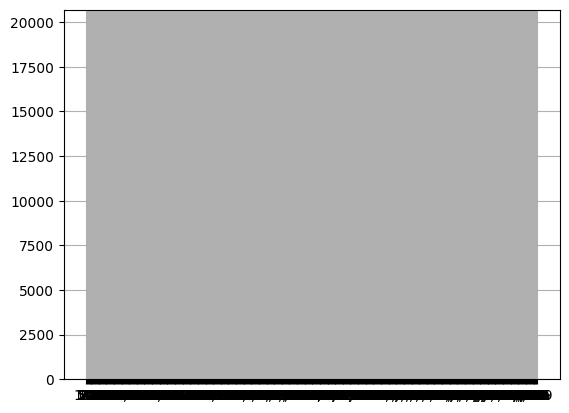

In [13]:
var = 'Price' # A numeric variable
print(airbnb[var].unique(),'\n') # Any problem values?
print(airbnb[var].hist(), '\n') # This does not look very good.
print(airbnb[var].isna().sum(),'\n') # Any missing values?

Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 



<Axes: >

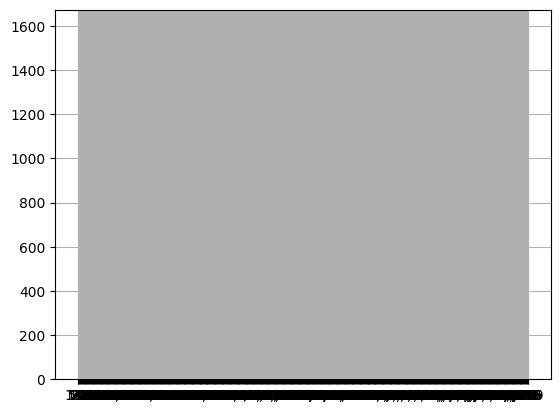

In [14]:
print('Before coercion: \n', airbnb[var].describe(),'\n') # The age variable is not read by Pandas as a number
airbnb[var].hist(bins=300) # Initial histogram; check out the x axis

In [15]:
#df[var].str.replace(pattern, replacement)
price= airbnb[var].str.replace(",", "")
print(price)
price= airbnb[var].str.replace("$", "")
print(price)

0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: object
0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: object


After coercion: 
 count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64 

Total Missings: 
 181 



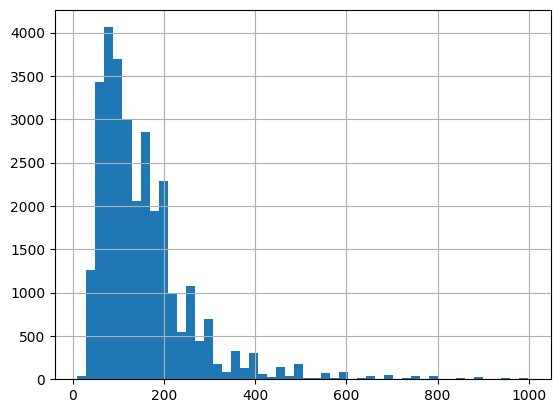

In [16]:
# How to coerce a variable to numeric:
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce') # Coerce the variable to numeric

# Create a missing dummy:
airbnb['Price_nan'] = airbnb['Price'].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', airbnb['Price'].describe(),'\n') # Describe the numeric variable
airbnb['Price'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(airbnb['Price_nan']),'\n') # How many missing values are there? A: 181

In [17]:
airbnb['Price_na'] = airbnb['Price'].isnull() # Equals 1 if missing, 0 if non-null

# Compute the value to impute, in this case the median:
impute_value = airbnb['Price'].median() # Or mean, or whatever

# Impute the median of the non-missing data:
airbnb['Price_impute'] = airbnb['Price'].fillna(impute_value)

In [19]:
policeforce = pd.read_csv('./wrangling_assignment/data/mn_police_use_of_force.csv')
policeforce.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [20]:
catvar = 'subject_injury' # A categorical variable
print(policeforce[catvar].unique(), '\n') # A Categorical Example
policeforce[catvar] = policeforce[catvar].replace(' ',np.nan) # Notice the column replacement
print(policeforce[catvar].value_counts(), '\n')

[nan 'No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 



In [21]:
policeforce_ct = pd.get_dummies(policeforce['subject_injury']) # This helps with intuition
policeforce_ct.head()

,No,Yes
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [22]:
policeforce_ct = pd.get_dummies(policeforce['subject_injury'], drop_first=True, dtype=int) # This is how we typically want the results
policeforce_ct.head() # Which category was dropped? Is that ideal?

,Yes
0,0
1,0
2,0
3,0
4,0


In [23]:
print(policeforce['subject_injury'].value_counts(), '\n') # How many injuries or non-injuries?
conditional = (policeforce['subject_injury']=='F') # Conditional: There was no injury
print(conditional.value_counts(), '\n') # Counts for the conditional variable: 7029 True

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

subject_injury
False    12925
Name: count, dtype: int64 



In [ ]:
pd.crosstab(policeforce['subject_injury'], policeforce['force_type']) # Notice the use of pd. and not df.

In [ ]:
policeforce['subject_injury_NA'] = policeforce['subject_injury'].isnull()
print(pd.crosstab(policeforce['subject_injury_NA'],policeforce['force_type']),'\n') # Not very illuminating

In [ ]:
justice = pd.read_parquet('./data/justice_data.parquet')
justice.head()

In [ ]:
var2 = 'WhetherDefendantWasReleasedPretrial' #
print(justice[var2].unique(), '\n') # A Categorical Example
justice[var2] = justice[var2].replace(' ',np.nan) # Notice the column replacement
print(justice[var2].value_counts(), '\n')

In [ ]:
var2 = 'WhetherDefendantWasReleasedPretrial' # A Dummy Example
print(justice[var2].unique(), '\n')
justice[var2] = justice[var2].replace([9],np.nan)
print(justice[var2].value_counts())

In [ ]:
var3 = 'ImposedSentenceAllChargeInContactEvent' # A Categorical Example
print(justice[var3].unique(), '\n') #Notice a ' ' value
justice[var3] = justice[var3].replace(' ',np.nan) # Notice the column replacement
print(justice[var3].value_counts(), '\n')

In [ ]:
justice['SentenceTypeAllChargesAtConvictionInContactEvent'].unique()
SentType = justice['SentenceTypeAllChargesAtConvictionInContactEvent']
print(SentType.unique())

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [83]:
import requests
from io import BytesIO
url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"
response = requests.get(url)
print(response)
sharkattack = pd.read_excel(BytesIO(response.content), engine='xlrd')
sharkattack.head()

<Response [200]>


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
sharkattack_cleaned = sharkattack.dropna(axis=1, how='all')
print("\nDataFrame after dropping columns with any missing values:")
print(sharkattack_cleaned)
sharkattack_cleaned.head()


DataFrame after dropping columns with any missing values:
                  Date    Year        Type             Country  \
0     16th August 2025  2025.0    Provoked                 USA   
1          18th August  2025.0  Unprovoked           Australia   
2          17th August  2025.0  Unprovoked             Bahamas   
3           7th August  2025.0  Unprovoked           Australia   
4           1st August  2025.0  Unprovoked         Puerto Rico   
...                ...     ...         ...                 ...   
7037       Before 1903     0.0  Unprovoked           AUSTRALIA   
7038       Before 1903     0.0  Unprovoked           AUSTRALIA   
7039         1900-1905     0.0  Unprovoked                 USA   
7040         1883-1889     0.0  Unprovoked              PANAMA   
7041         1845-1853     0.0  Unprovoked  CEYLON (SRI LANKA)   

                                  State                             Location  \
0                               Florida               Cayo Costa Boc

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
var4 = 'Year'
print(sharkattack[var4].unique(), '\n')
#Describe the range of values you see: years from 1000 to 2025 with some outliers like 0, 5, 77, nan

[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909.
 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897.
 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888. 1887. 1886. 1885.
 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876. 1875. 1874. 1873.
 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865. 18

<Axes: >

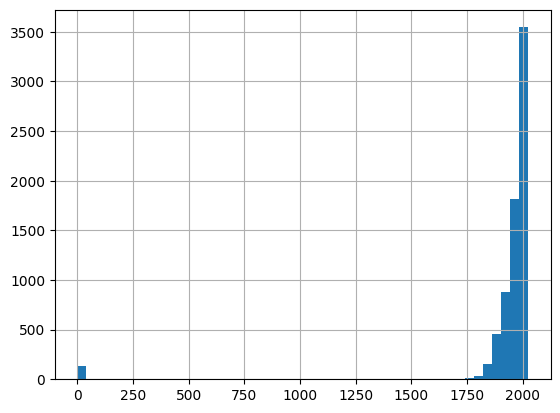

In [86]:
sharkattack_cleaned['Year'] = pd.to_numeric(sharkattack_cleaned['Year'], errors='coerce') # Coerce the variable to numeric
sharkattack_cleaned['Year'].describe()
sharkattack_cleaned['Year'].hist(bins = 50)

In [87]:
sharkattackrecent= sharkattack_cleaned[sharkattack_cleaned['Year'] >= 1940]
sharkattackrecent.head()
sharkattackrecent.groupby('Year').size()
#Are attacks increasing, decreasing, or remaining constant over time?: The attacks have increased since 1940 but in 2024 to current the attacks are beginning to decrease back to the numbers that were seen in the 1940s

,0
Year,
1940.0,24
1941.0,27
1942.0,41
1943.0,28
1944.0,31
...,...
2022.0,98
2023.0,109
2024.0,52


In [88]:
#Clean the Age variable and make a histogram of the ages of the victims.
var5= 'Age'
print(sharkattack_cleaned[var5].unique(), '\n')
#found that people gave a range of ages, multiple ages, described their age with words or a term

['?' '63' '9' '39' '19' '7' '85' '69' '18' '66' '21' '40' '37' '16' '20'
 '12' '42' '26' '14' '45' '30' '30+' '56' '40+' '29' 35 58 29 24 20 55 17
 12 37 36 23 40 28 69 48 '60+' 57 45 61 27 38 16 68 33 30 15 41 14 43 26
 'Middle age' 18 21 49 25 46 19 65 64 '13' nan '11' '46' '32' '10' '64'
 '62' '22' '15' '52' '44' '47' '55' '59' '8' '50' '34' '38' '30s' '20/30'
 '35' '65' '20s' '77' '60' '49' '!2' '24' '73' '25' '50s' '58' '67' '17'
 '6' '41' '53' '68' '43' '51' '31' 39 51 10 13 60 '40s' 62 'teen' 8 22 32
 56 'Teen' 42 50 'M' 9 31 11 34 '!6' '!!' 47 7 71 59 53 54 75 '45 and 15'
 73 52 70 4 63 44 '28 & 22' '22, 57, 31' '60s' "20's" 67 74 '9 & 60'
 'a minor' 6 3 82 '40?' 66 72 '23' '36' '71' '48' '70' '18 months' '57'
 '28' '33' '61' '74' '27' '3' '28 & 26' '5' '54' '86' '18 or 20'
 '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' 77 '36 & 26' '8 or 10' 84
 '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' '33 or 37' 'mid-30s' '23 & 20' 5
 ' 30' '7      &    31' ' 28' '20?' "60's" '32 & 30' '16 to 18' '8

After coercion: 
 count    3903.000000
mean       28.154497
std        14.649413
min         1.000000
25%        17.000000
50%        24.000000
75%        37.000000
max        87.000000
Name: Age, dtype: float64 

Total Missings: 
 3139 



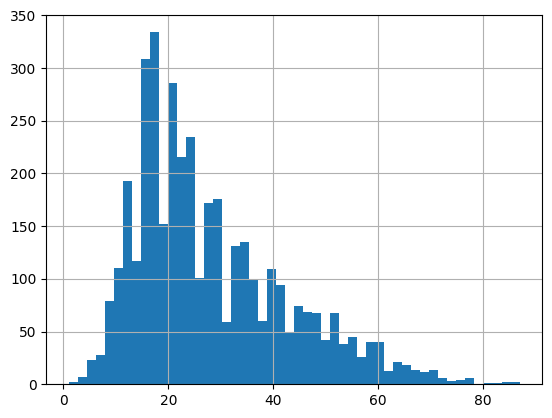

In [89]:
# coerce a variable to numeric:
sharkattack_cleaned['Age'] = pd.to_numeric(sharkattack_cleaned['Age'], errors='coerce') # Coerce the variable to numeric

# Create a missing dummy:
sharkattack_cleaned['Age_nan'] = sharkattack_cleaned['Age'].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', sharkattack_cleaned['Age'].describe(),'\n') # Describe the numeric variable
sharkattack_cleaned['Age'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(sharkattack_cleaned['Age_nan']),'\n') # How many missing values are there? | A: 3139 missing values

<Axes: >

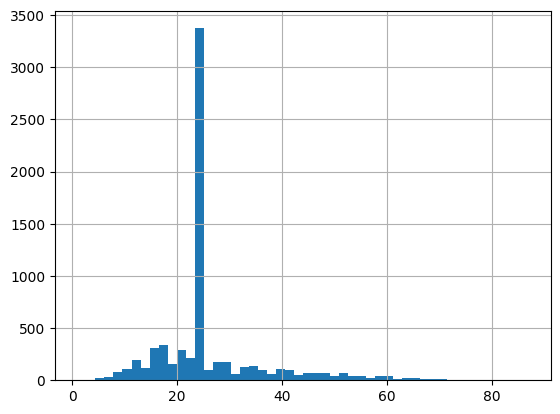

In [90]:
sharkattack_cleaned['Age_na'] = sharkattack_cleaned['Age'].isnull() # Equals 1 if missing, 0 if non-null

# Compute the value to impute, in this case the median:
sharkimpute_value = sharkattack_cleaned['Age'].median() # Or mean, or whatever

# Impute the median of the non-missing data:
sharkattack_cleaned['Age_impute'] = sharkattack_cleaned['Age'].fillna(sharkimpute_value)

#make histogram
sharkattack_cleaned['Age_impute'].hist(bins = 50)

In [91]:
var6 = 'Sex'
print(sharkattack_cleaned[var6].unique(), '\n')
#notice that not all the sexes are capitalized and some have spaces

sharkattack_cleaned['Sex'] = sharkattack_cleaned['Sex'].str.upper()
sharkattack_cleaned['Sex'] = sharkattack_cleaned['Sex'].str.strip()
print(sharkattack_cleaned[var6].unique(), '\n')

sharkattack_cleaned[var6] = sharkattack_cleaned[var6].replace('N','M') # assuming those who types N meant M because they are right next to each other on the keyboard
print(sharkattack_cleaned[var6].value_counts(), '\n')

sharkattack_cleaned[var6] = sharkattack_cleaned[var6].replace(['nan', 'LLI', 'M X 2', '.'],np.nan) # Notice the column replacement
print(sharkattack_cleaned[var6].value_counts(), '\n')

['M' 'F' 'F ' 'M ' nan ' M' 'm' 'lli' 'M x 2' 'N' '.'] 

['M' 'F' nan 'LLI' 'M X 2' 'N' '.'] 

Sex
M        5654
F         806
LLI         1
M X 2       1
.           1
Name: count, dtype: int64 

Sex
M    5654
F     806
Name: count, dtype: int64 



In [92]:
#What proportion of victims are male? | A: ~ 87.5%
maleportion= 5652/(5652+806)
print(maleportion)

0.8751935583772066


In [93]:
#Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked? | A: ~74%
var7 = 'Type'
print(sharkattack_cleaned[var7].unique(), '\n')
#noticed the following different unique objects: ['Provoked' 'Unprovoked' 'Questionable' 'unprovoked' ' Provoked' 'Watercraft' 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid' 'Under investigation' 'Boat']

sharkattack_cleaned['Type'] = sharkattack_cleaned['Type'].str.lower()
sharkattack_cleaned['Type'] = sharkattack_cleaned['Type'].str.strip()
print(sharkattack_cleaned[var7].unique(), '\n')

#replacing all synonyms for unknown and incidents that are not classified as provoked or unprovoked as unknown
sharkattack_cleaned[var7] = sharkattack_cleaned[var7].replace(['questionable', 'unverified', 'under investigation', 'unconfirmed','nan', '?','invalid', 'watercraft', 'sea disaster', 'boat'],'unkown') # assuming those who types N meant M because they are right next to each other on the keyboard
print(sharkattack_cleaned[var7].value_counts(), '\n')

unprovokedportion = 5197/(5197+1186+641)
print(unprovokedportion)

['Provoked' 'Unprovoked' 'Questionable' 'unprovoked' ' Provoked'
 'Watercraft' 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat'] 

['provoked' 'unprovoked' 'questionable' 'watercraft' 'sea disaster' nan
 '?' 'unconfirmed' 'unverified' 'invalid' 'under investigation' 'boat'] 

Type
unprovoked    5197
unkown        1186
provoked       641
Name: count, dtype: int64 

0.7398917995444191


In [97]:
#Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.
var8 = 'Fatal Y/N'
print(sharkattack_cleaned[var8].unique(), '\n')

sharkattack_cleaned['Fatal Y/N'] = sharkattack_cleaned['Fatal Y/N'].str.upper()
sharkattack_cleaned['Fatal Y/N'] = sharkattack_cleaned['Fatal Y/N'].str.strip()
print(sharkattack_cleaned[var8].unique(), '\n')

sharkattack_cleaned[var8] = sharkattack_cleaned[var8].replace(['M','NQ'],'N') # assuming those who types M meant N because they are right next to each other on the keyboard
print(sharkattack_cleaned[var8].value_counts(), '\n')

sharkattack_cleaned[var8] = sharkattack_cleaned[var8].replace(['Y X 2', 'F'],'Y') # assuming those who typed Y at all meant yes and those who type F meant fatal
print(sharkattack_cleaned[var8].value_counts(), '\n')

sharkattack_cleaned[var8] = sharkattack_cleaned[var8].replace('UNKNOWN',np.nan) # making all unknowns nan
print(sharkattack_cleaned[var8].value_counts(), '\n')

['N' 'Y' nan 'UNKNOWN'] 

['N' 'Y' nan 'UNKNOWN'] 

Fatal Y/N
N          4921
Y          1488
UNKNOWN      71
Name: count, dtype: int64 

Fatal Y/N
N          4921
Y          1488
UNKNOWN      71
Name: count, dtype: int64 

Fatal Y/N
N    4921
Y    1488
Name: count, dtype: int64 



In [103]:
#Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?'

pd.crosstab(sharkattack_cleaned['Sex'], sharkattack_cleaned['Type']) # trying to see the relationship between sex and type

#sharks are more likely to attack men in general but the propotion of unproked attacks relative to sex shows that when attacked women are more likely to have a shark launch an unprovoked attack at them with the proportion of attacks being ~85% opposed to the male's unproked rate of ~77%

FType = 683/(683+88+31)
print(FType)

MType = 4345/(4345+744+551)
print(MType)

#Are sharks more likely to launch unprovoked attacks on men or women? | A: sharks are more likely to attack men in general but the propotion of unproked attacks relative to sex shows that when attacked women are more likely to have a shark launch an unprovoked attack at them with the proportion of attacks being ~85% opposed to the male's unproked rate of ~77%

0.8516209476309227
0.7703900709219859


In [105]:
pd.crosstab(sharkattack_cleaned['Fatal Y/N'], sharkattack_cleaned['Type']) #trying to see relationship between fatality anf type

Yprovoked = 21/(21+612) #~3.3% of provoked attacks were fatal with the remainder being nonfatal
Yunprovoked = 1264/(1264+3859) #~24.7% of unprovoked attacks were fatal with the remainder being nonfatal
print(Yprovoked)
print(Yunprovoked)

#Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? | A: The attack is more likely to be fatal when it is unproked

0.03317535545023697
0.2467304313878587


In [107]:
pd.crosstab(sharkattack_cleaned['Sex'], sharkattack_cleaned['Fatal Y/N']) #trying to see relationship between sex and fatality

sexfatality = 122/(122+1257) # of fatal accidents, when females are the victim the accident is fatal ~8.8% of the time leaving the remainder of the fatalities to males
print(sexfatality)

#Is it more or less likely to be fatal when the victim is male or female? | A: It is more likely to be fatal when the victim is a male
#How do you feel about sharks? | A: I do not like sharks because I am scared of being attacked

0.08846990572878898


In [114]:
#What proportion of attacks appear to be by white sharks? (Hint: str.split() makes a vector of text values into a list of lists, split by spaces.) | A: ~7.05% or 10.6% of attacks are by white sharks
var9 = 'Species '
print(sharkattack_cleaned[var9].unique(), '\n')

sharkattack_cleaned['Species_cleaned '] = sharkattack_cleaned['Species '].str.lower()
sharkattack_cleaned['Species_cleaned'] = sharkattack_cleaned['Species_cleaned '].str.strip()
print(sharkattack_cleaned[var9].unique(), '\n')

proportionofwhite = sharkattack_cleaned['Species_cleaned'].str.contains('white').mean()
print(proportionofwhite)

['lemon shark 1.8 m (6ft)' '5m (16.5ft) great white' 'undetermined' ...
 "12' tiger shark" 'blue pointers'
 'said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'] 

['lemon shark 1.8 m (6ft)' '5m (16.5ft) great white' 'undetermined' ...
 "12' tiger shark" 'blue pointers'
 'said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'] 

0.10678784436239705


In [ ]:

# Fill NaN values with empty string before splitting
sharkattack_cleaned['Species '] = sharkattack_cleaned['Species '].fillna('')

proportionofwhite = sharkattack_cleaned['Species_cleaned'].str.split().apply(lambda x: x[0] == 'white' if x else False).mean()
print(proportionofwhite)

In [40]:
for Year in range (1940,2026):
  print(Year)

1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025


In [38]:
targetyear= 1940
conditional2 = "targetyear > 1940"
filtered_sharkattack = sharkattack[sharkattack['event_date'].isna() | (sharkattack['event_date'].dt.year >= targetyear)]
sharkattack_cleaned_cond = sharkattack_cleaned.query(conditional2)
sharkattack_cleaned_cond.shape

UndefinedVariableError: name 'targetyear' is not defined

In [ ]:
sharkattack = pd.read_excel("GSAF5.xls")
sharkattack.head()